In [1]:
import numpy as np
import pandas as pd
import igraph as ig
import vmlab

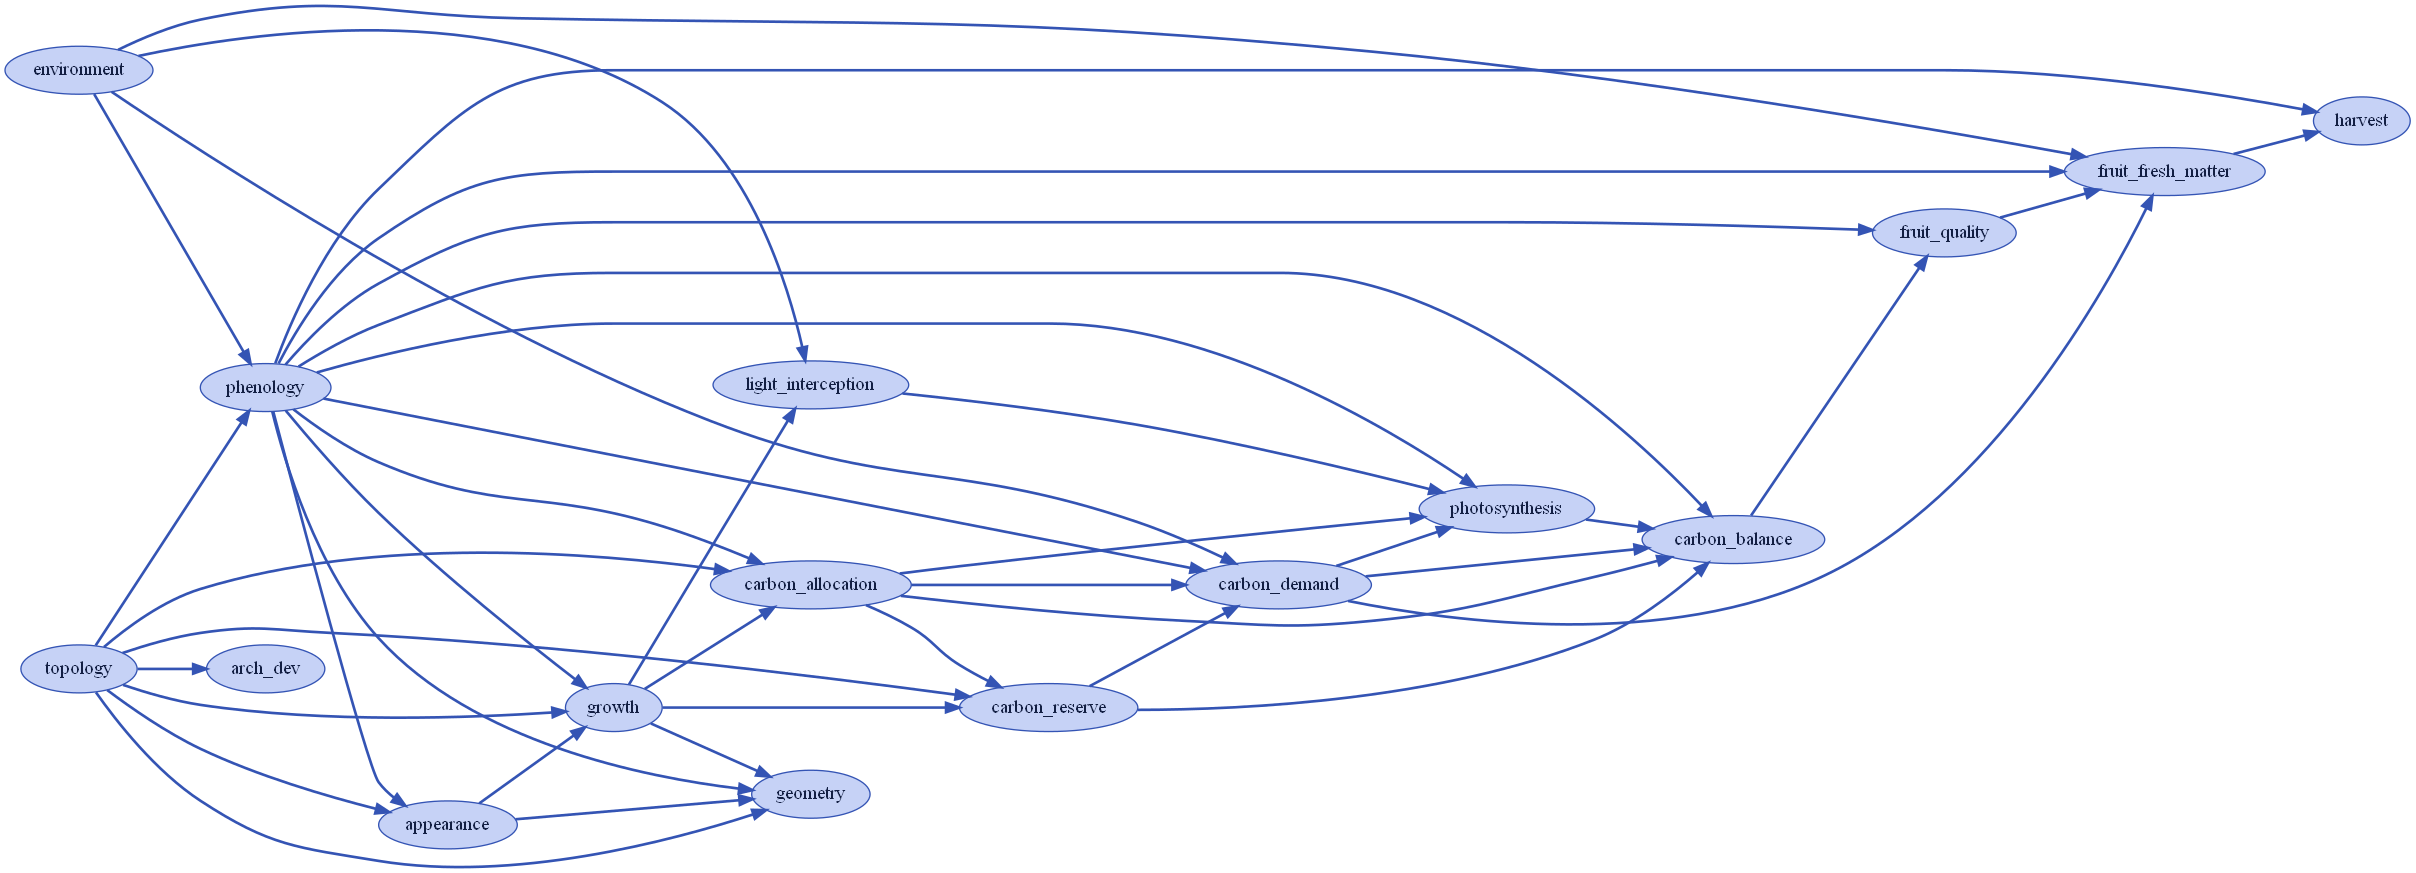

In [2]:
from vmlab.models import fruit_model
from vmlab.processes import harvest
fruit_model = fruit_model.update_processes({'harvest': harvest.HarvestByQuality})
fruit_model.visualize()

In [3]:
tree = pd.read_csv('../../share/trees/branch_G3.csv')
# tree

In [4]:
setup = vmlab.create_setup(
    model=fruit_model,
    tree=tree,
    start_date='2003-06-01',
    end_date='2004-06-01',
    setup_toml='../../share/setup/fruit_model_branch.toml',
    current_cycle=3,
    input_vars={
        'topology': {
            'seed': 11,
        },
        'geometry__interpretation_freq': 15
    },
    output_vars={
        'carbon_balance': {
            'DM_fruit': 'day',
        },
        'harvest': {
            'ripeness_index': 'day'
        },
        'fruit_fresh_matter': {
            'FM_fruit': 'day',
            'DM_fleshpeel': 'day',
            'W_fleshpeel': 'day',
            'DM_flesh': 'day',
            'W_flesh': 'day',
            'flux_xylem_phloem': 'day',
            'transpiration_fruit': 'day',
            'turgor_pressure_fruit': 'day',
            'osmotic_pressure_fruit': 'day',
            'sucrose': 'day'
        }
    }
)

In [5]:
ds_out = vmlab.run(setup, fruit_model, geometry=True)

SceneWidget(scenes=[{'id': '456gs9aZ8XdXbCpHJ3bGYGjnV', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0% | initialize 

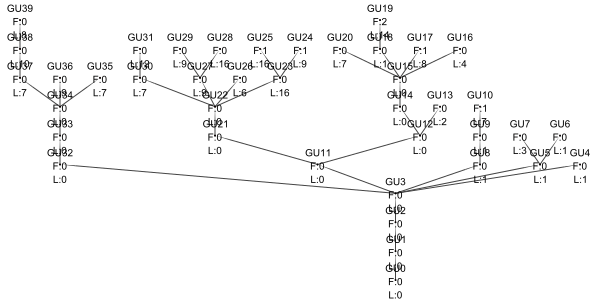

In [6]:
g = ig.Graph.Adjacency([row.tolist() for row in ds_out.topology__adjacency[-1].data.astype(np.int64)])
layout = g.layout_reingold_tilford(root=0.)
layout.rotate(-180)
ig.plot(g, layout=layout, bbox=(600, 300), **{
    'vertex_size': 1,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1,
    'vertex_label': [
        f'GU{idx}\nF:{int(ds_out.harvest__nb_fruit_harvested.data[idx])}\nL:{int(ds_out.growth__nb_leaf.data[idx])}' for idx in g.vs.indices
    ]
})

In [7]:
# how can we select all variables for GUs with at leat one fruit ? 
ds = ds_out[['fruit_fresh_matter__FM_fruit', 'carbon_balance__DM_fruit']].sel({
        'day': slice('2003-06-01', '2004-06-01')
    }).where(ds_out.carbon_balance__DM_fruit > 0, drop=True).rename_vars({
        'fruit_fresh_matter__FM_fruit': 'FM',
        'carbon_balance__DM_fruit': 'DM',
    })
ds

<xarray.Dataset>
Dimensions:  (GU: 5, day: 130)
Coordinates:
  * GU       (GU) <U10 'GU10' 'GU17' 'GU19' 'GU24' 'GU25'
  * day      (day) datetime64[ns] 2003-11-15 2003-11-16 ... 2004-03-23
Data variables:
    FM       (day, GU) float32 134.9 136.3 134.8 nan nan ... nan nan 361.6 361.6
    DM       (day, GU) float32 14.88 15.19 14.86 nan nan ... nan nan 85.43 85.43

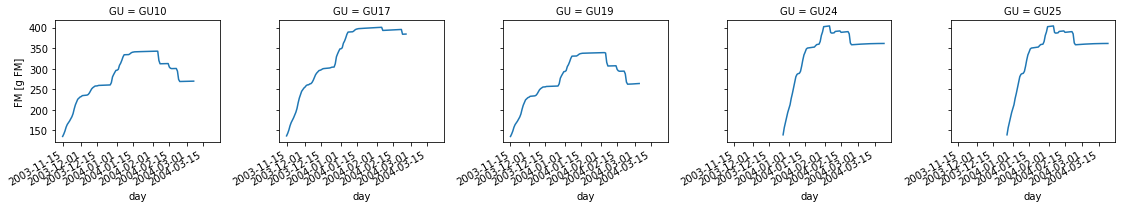

In [8]:
#ds_out.fruit_fresh_matter__FM_fruit.plot(col='GU', col_wrap=6)
ds.FM.plot(col='GU', col_wrap=6)

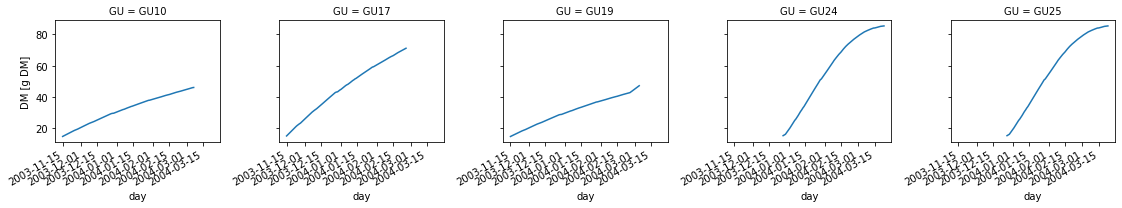

In [9]:
#ds_out.carbon_balance__DM_fruit.plot(col='GU', col_wrap=6)
ds.DM.plot(col='GU', col_wrap=6)

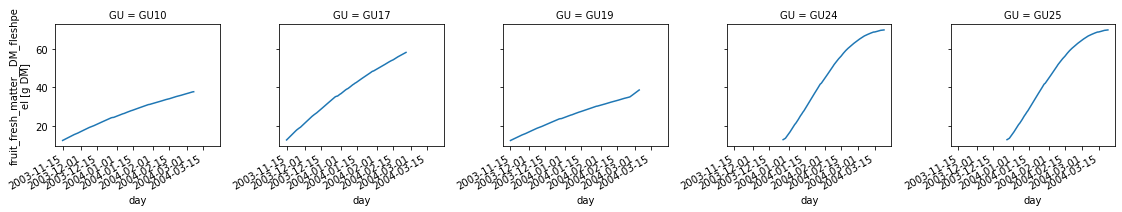

In [10]:
ds_out.fruit_fresh_matter__DM_fleshpeel.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

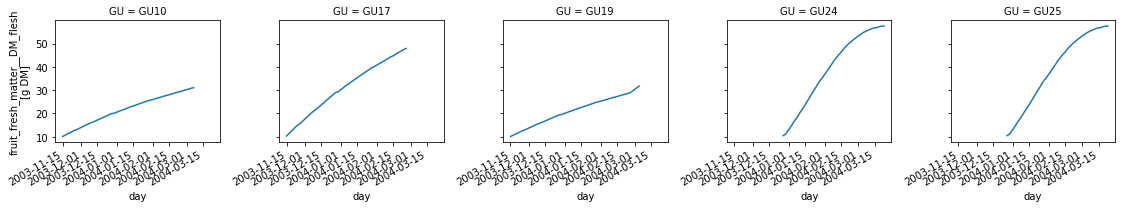

In [11]:
ds_out.fruit_fresh_matter__DM_flesh.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

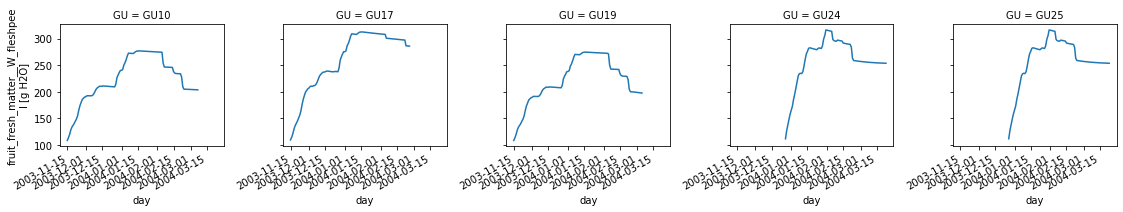

In [12]:
ds_out.fruit_fresh_matter__W_fleshpeel.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

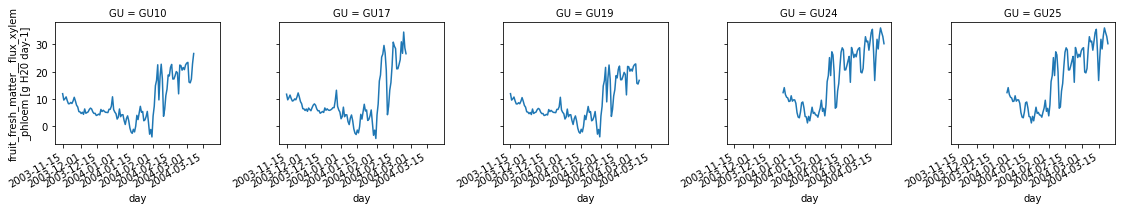

In [13]:
ds_out.fruit_fresh_matter__flux_xylem_phloem.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

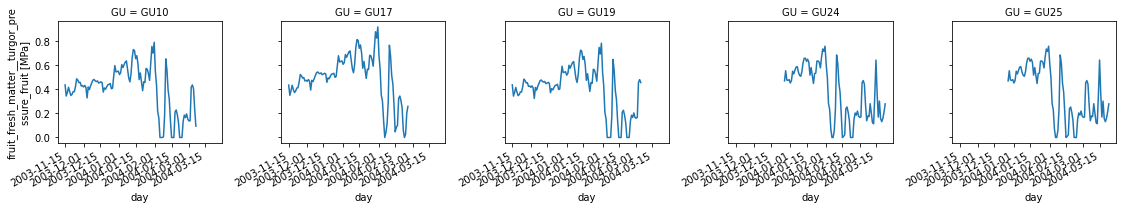

In [14]:
ds_out.fruit_fresh_matter__turgor_pressure_fruit.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

In [ ]:
ds_out.fruit_fresh_matter__turgor_pressure_fruit.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

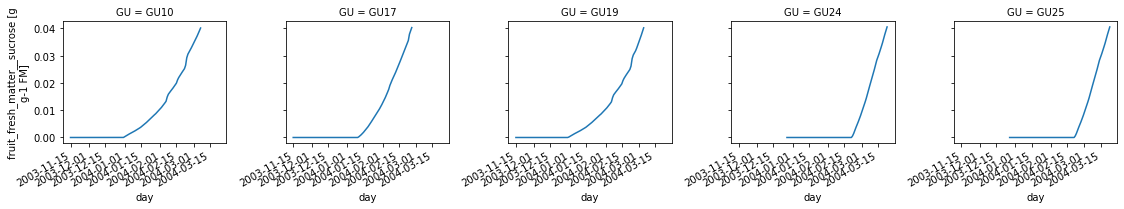

In [18]:
ds_out.fruit_fresh_matter__sucrose.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

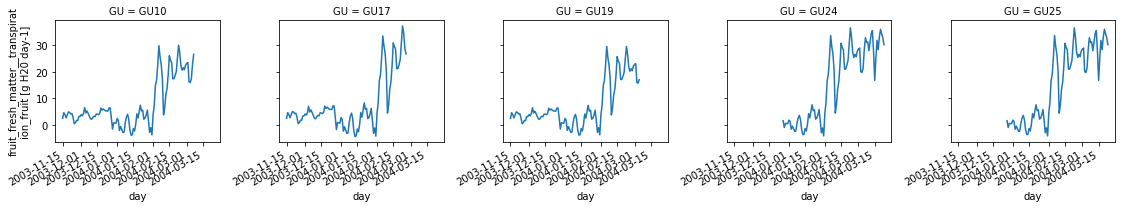

In [15]:
ds_out.fruit_fresh_matter__transpiration_fruit.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

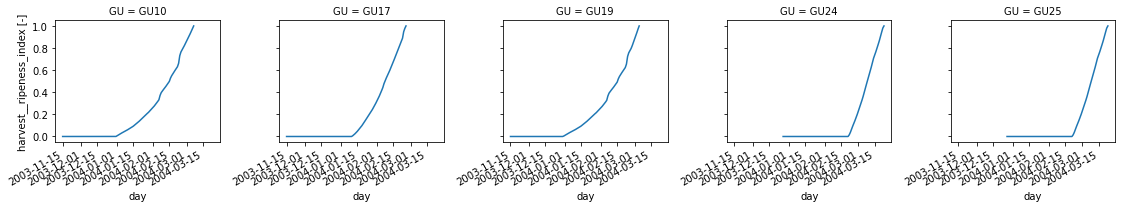

In [16]:
ds_out.harvest__ripeness_index.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

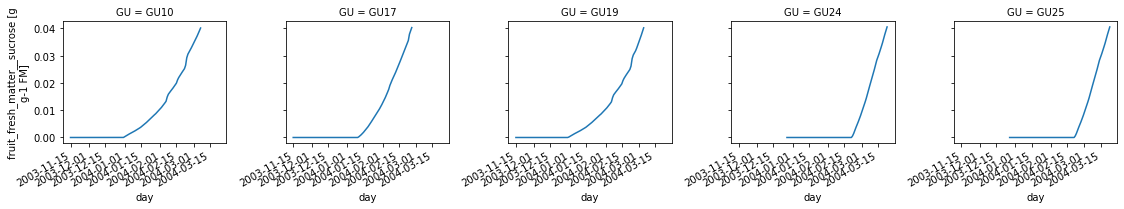

In [17]:
ds_out.fruit_fresh_matter__sucrose.where(ds_out.carbon_balance__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)